In [44]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import missingno as mso


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [45]:
df = pd.read_csv("insurance.csv", index_col=0).reset_index()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\pedro\AppData\Local\Temp\ipykernel_13220\290632124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
c:\Users\pedro\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


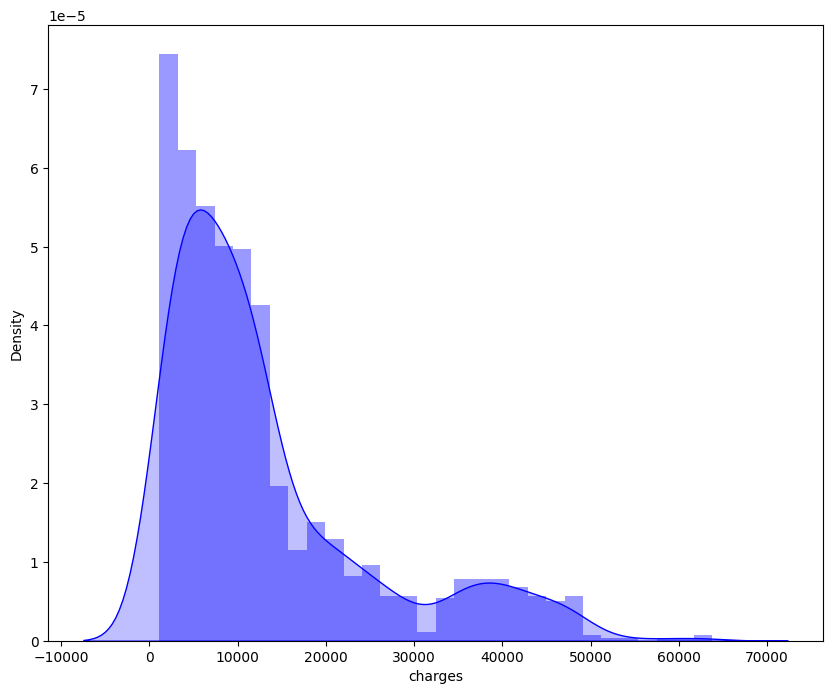

In [46]:
sns.distplot(
    df.charges,  
    color = "blue", 
    kde = True,
    kde_kws = {"shade": True, "linewidth": 1});


In [47]:
df_numerics = df.select_dtypes(include = np.number)
df_numerics.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


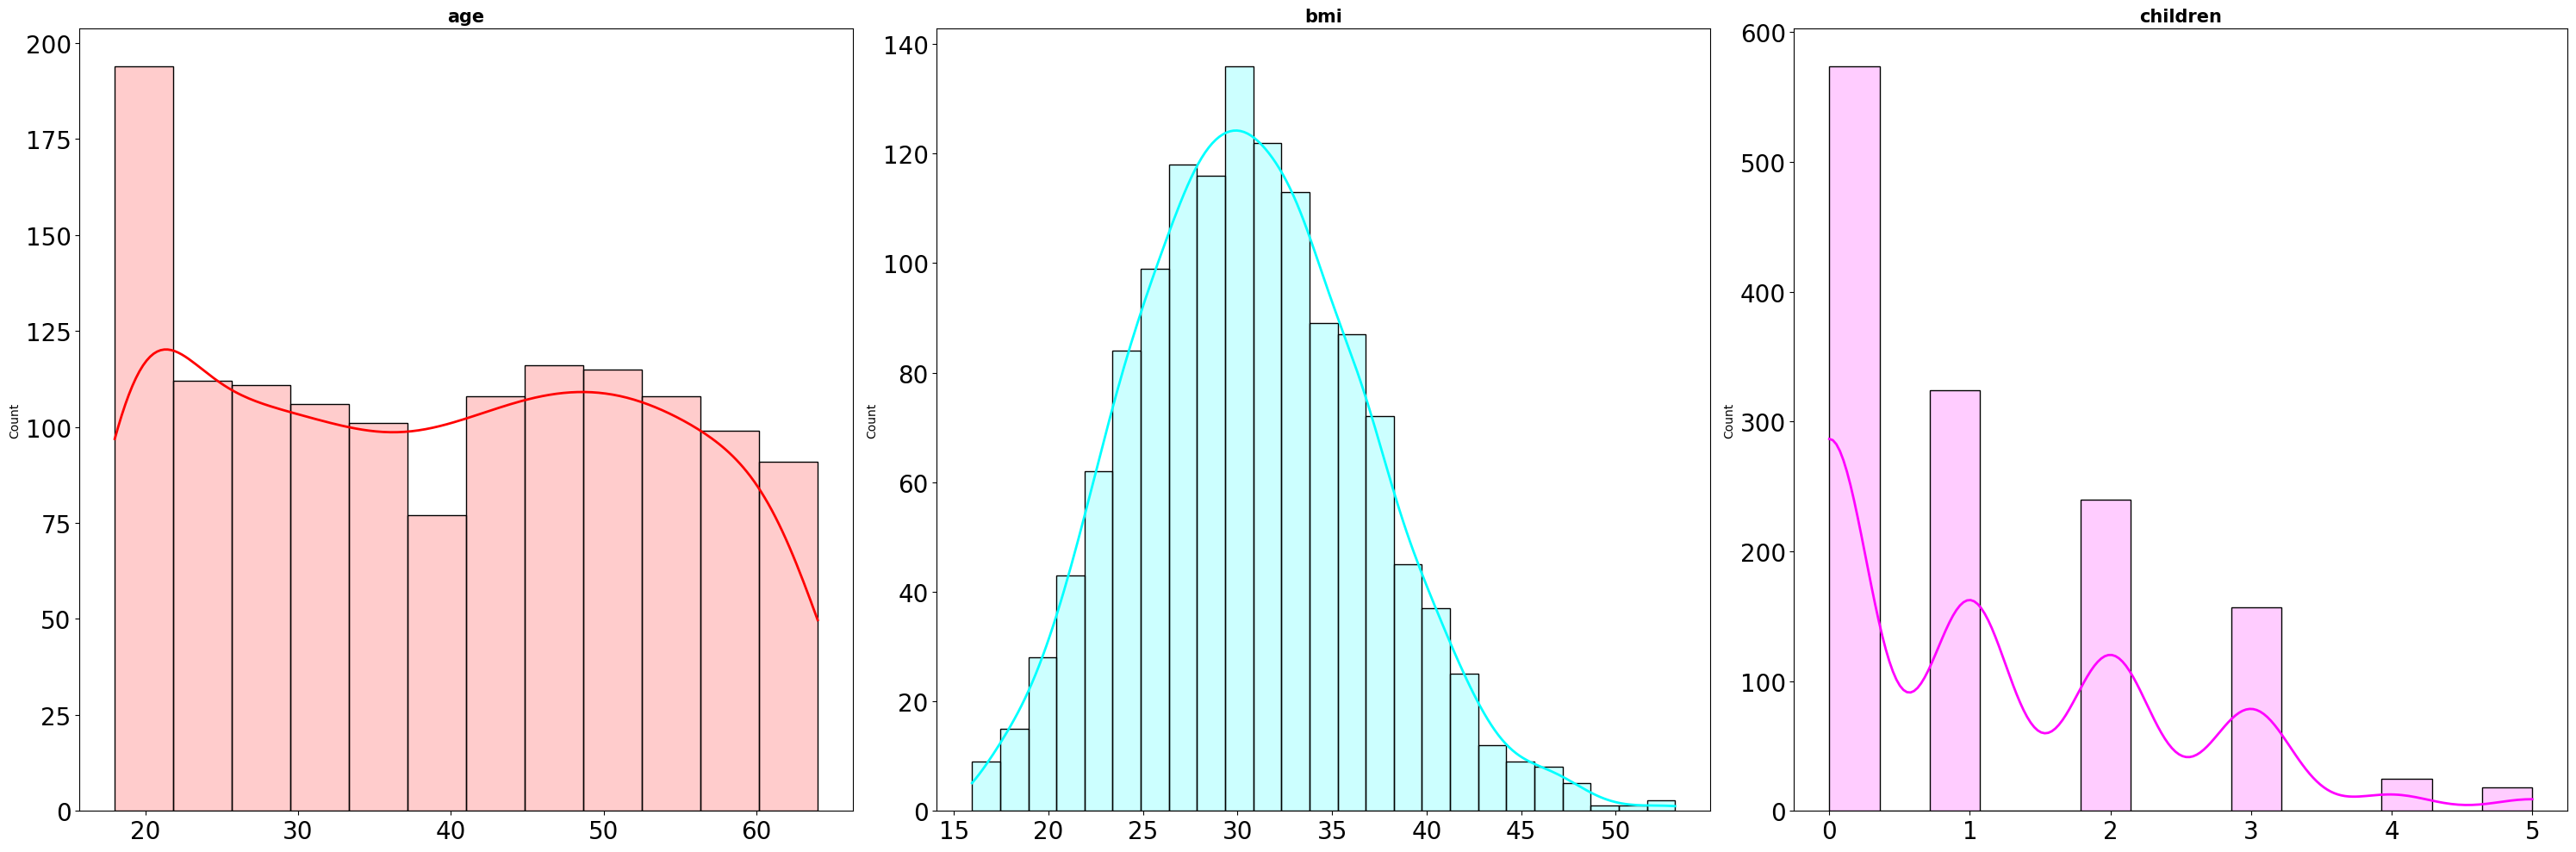

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = [ "red", "cyan", "magenta"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")
#es la variable respuesta, por lo que no tiene sentido que haga un subplot con sigo misma, asique la quitamos

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

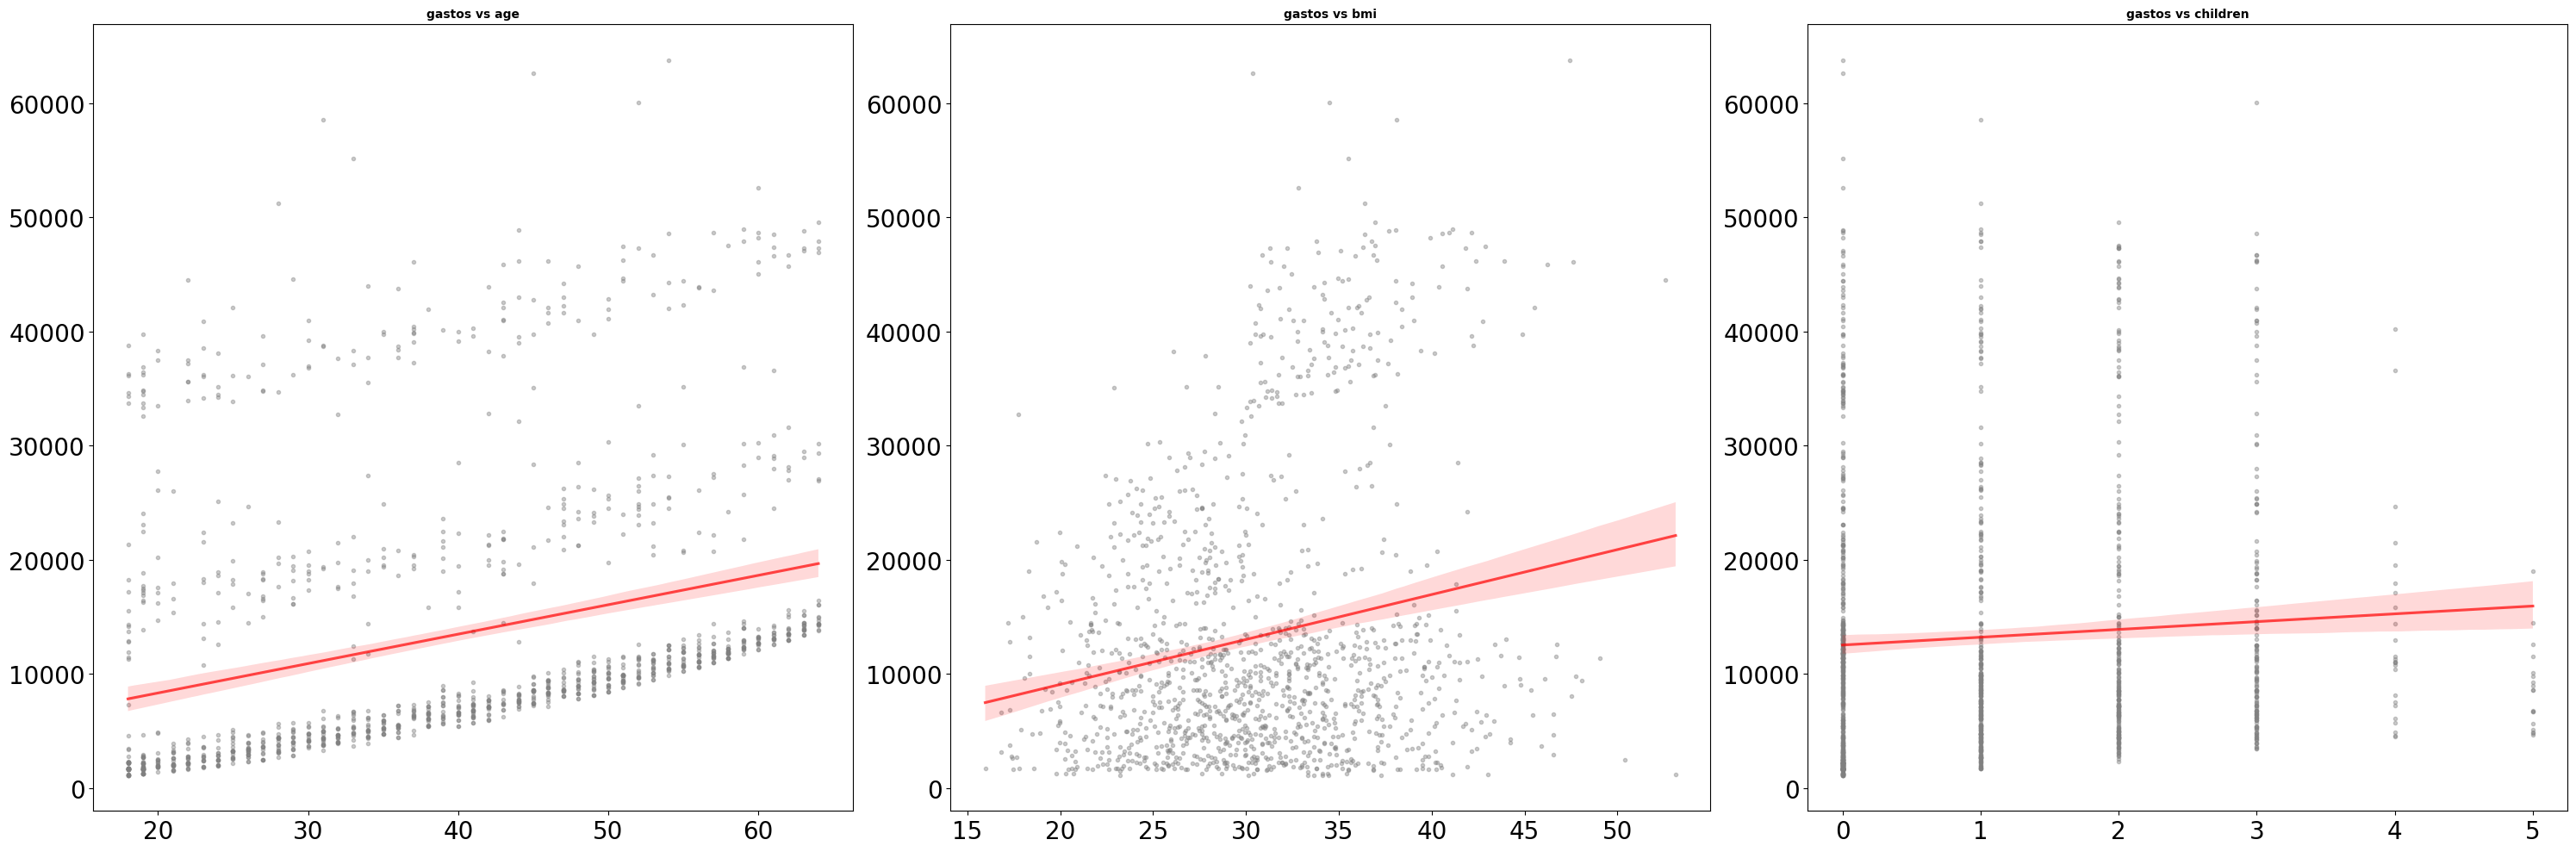

In [49]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"gastos vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

Aqui puedo ver que lo que le cuesta al seguro una persona no influye en la cantidad de hijos de este, es una linea muy recta.

In [50]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask


C:\Users\pedro\AppData\Local\Temp\ipykernel_13220\874613092.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
C:\Users\pedro\AppData\Local\Temp\ipykernel_13220\874613092.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

C:\Users\pedro\AppData\Local\Temp\ipykernel_13220\2819977681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


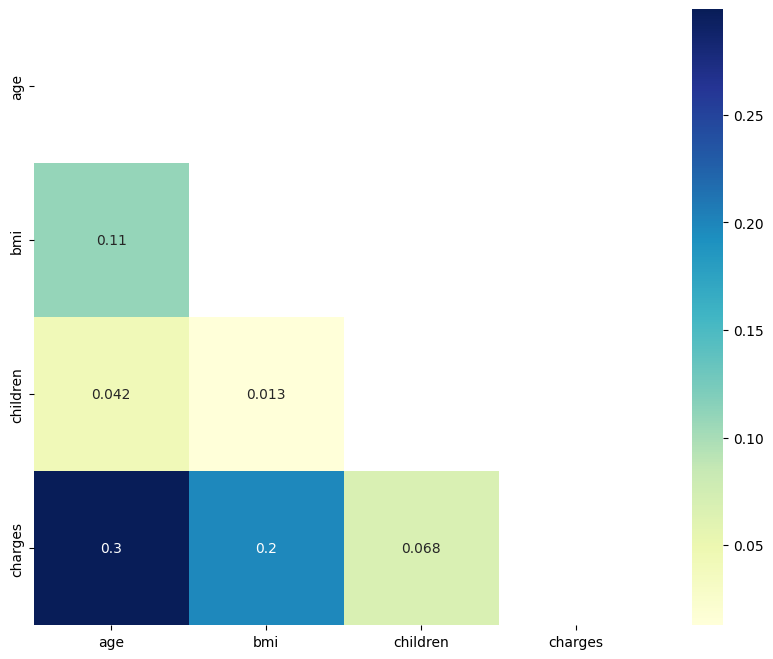

In [51]:
#se queda con los false
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [52]:
df_categoricas = df.select_dtypes(include = "object")
df_categoricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


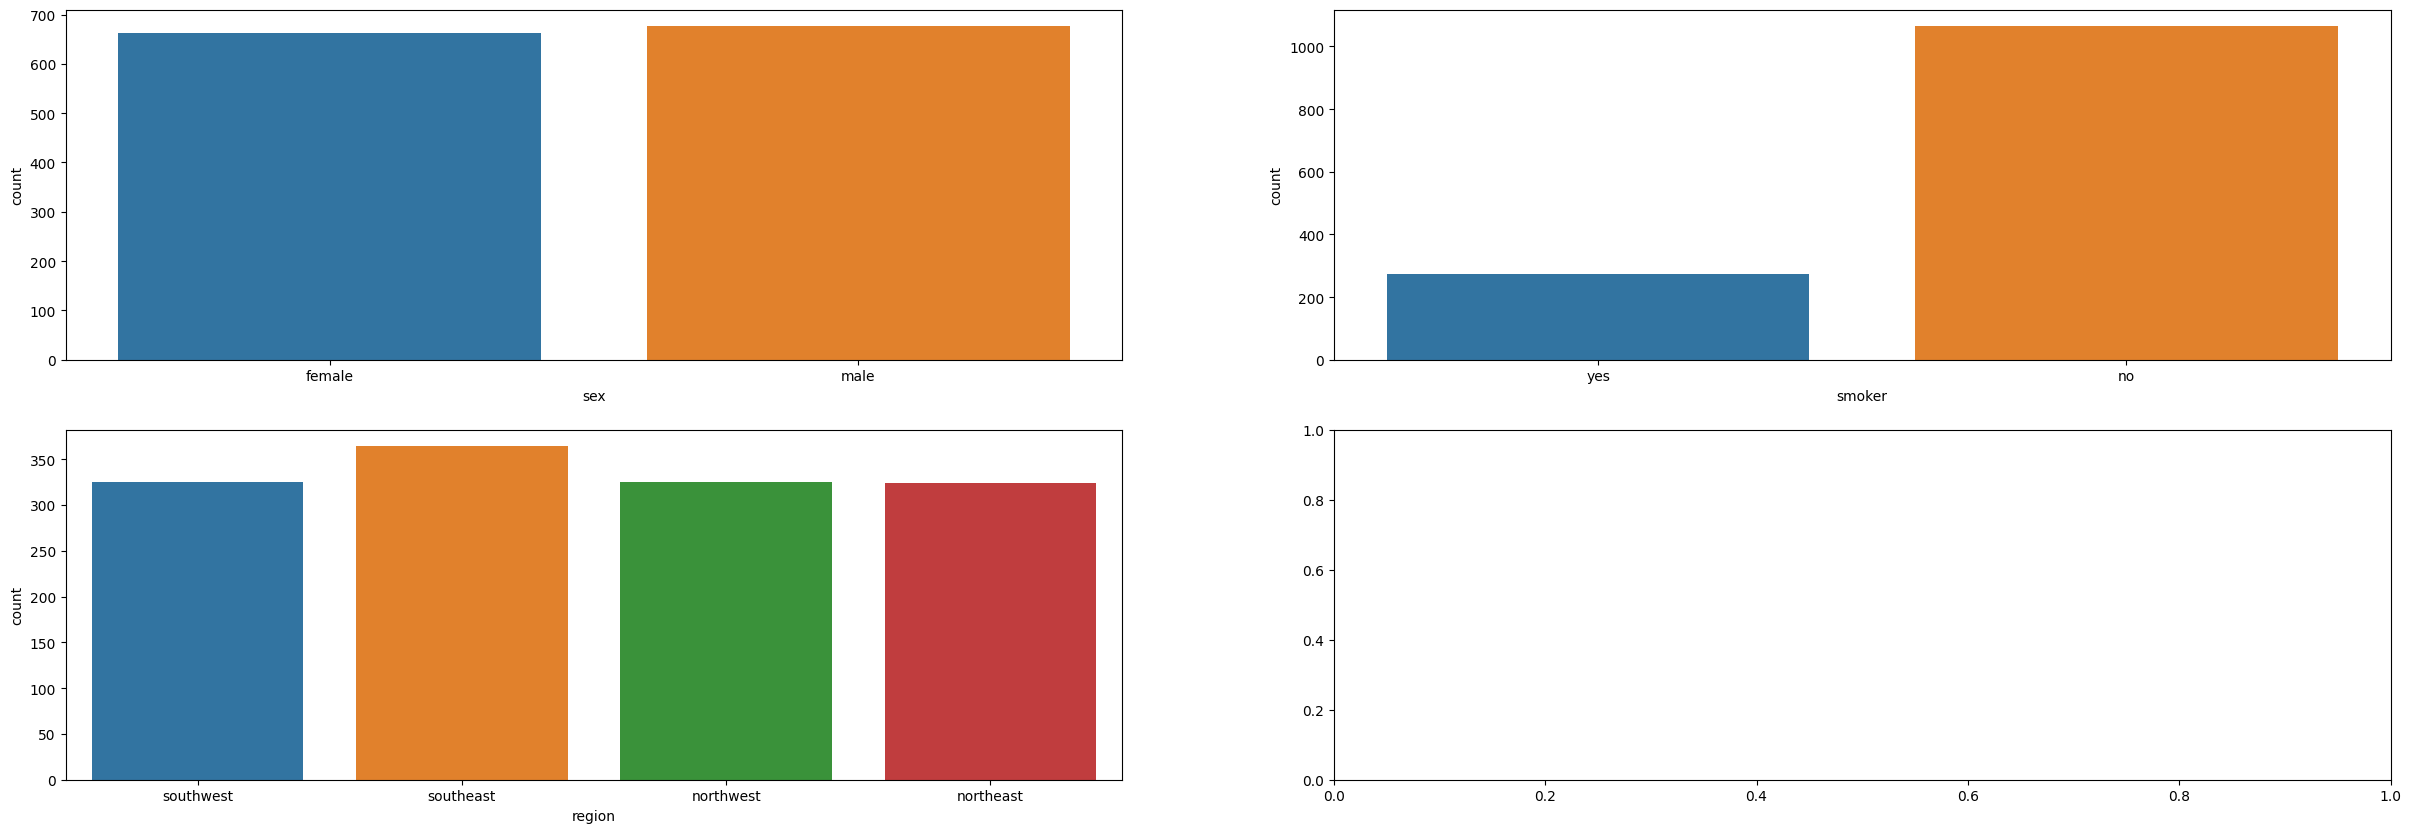

In [53]:
fig, axes = plt.subplots(nrows =2,ncols = 2, figsize = (30,10))
axes = axes.flat
for i , columns in enumerate(df_categoricas.columns):
    sns.countplot(data = df,
                  x = columns,
                  ax = axes[i]);

In [54]:
df_relacion_fumador = df.groupby("smoker")["charges"].mean().reset_index()
df_relacion_fumador

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [55]:
df_relacion_region = df.groupby("region")["charges"].mean().reset_index()
df_relacion_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [56]:
df_relacion = df.groupby("bmi")["charges"].mean().reset_index()
df_relacion

,bmi,charges
0,15.960,1694.796400
1,16.815,4904.000350
2,17.195,14455.644050
3,17.290,7813.353433
4,17.385,2775.192150
...,...,...
543,48.070,9432.925300
544,49.060,11381.325400
545,50.380,2438.055200
546,52.580,44501.398200


In [57]:
df_relacion_edad = df.groupby("age")["charges"].mean().reset_index()
df_relacion_edad

,age,charges
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


### Vamos a localizar los nulos y outliers, primero usando la libreria missigno que nos va a mostrar los nulos por columna:


<AxesSubplot: >

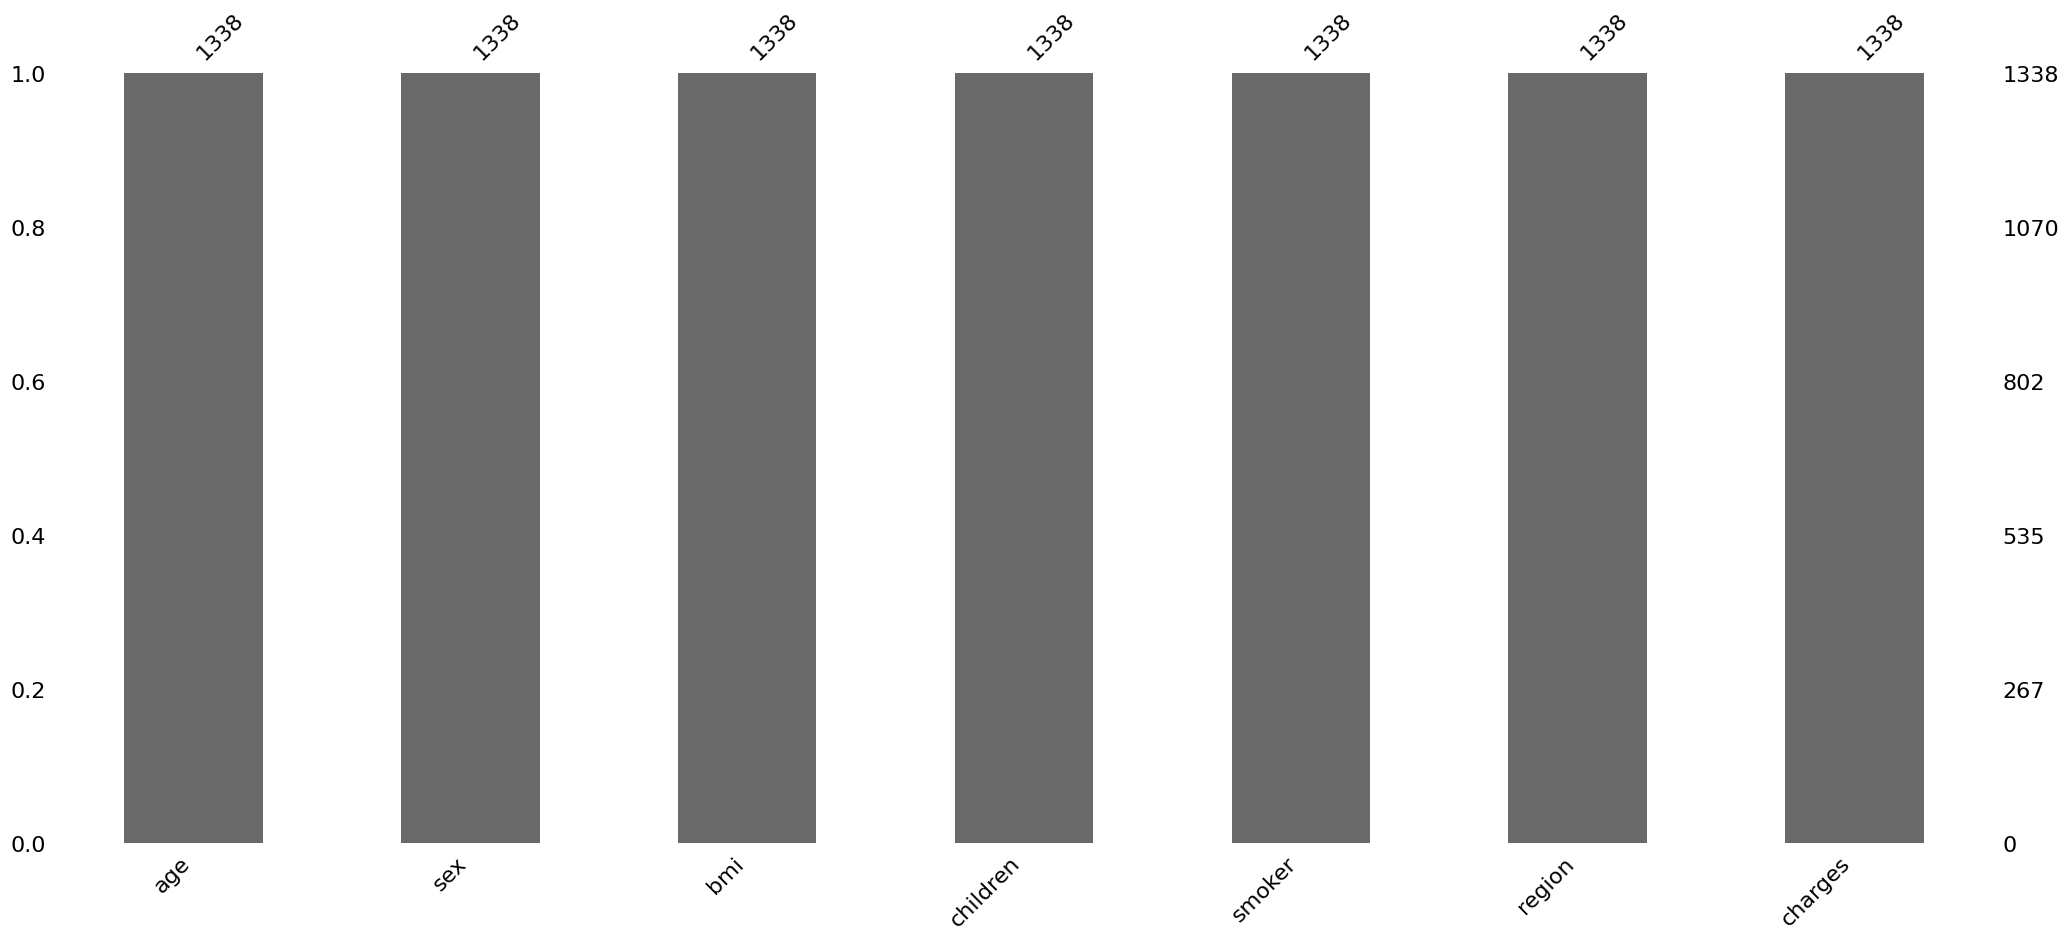

In [58]:
mso.bar(df)

### En este caso no hay nulos ni vacios, por lo que pasamos a localizar los outliers.

In [59]:
df_numerics.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


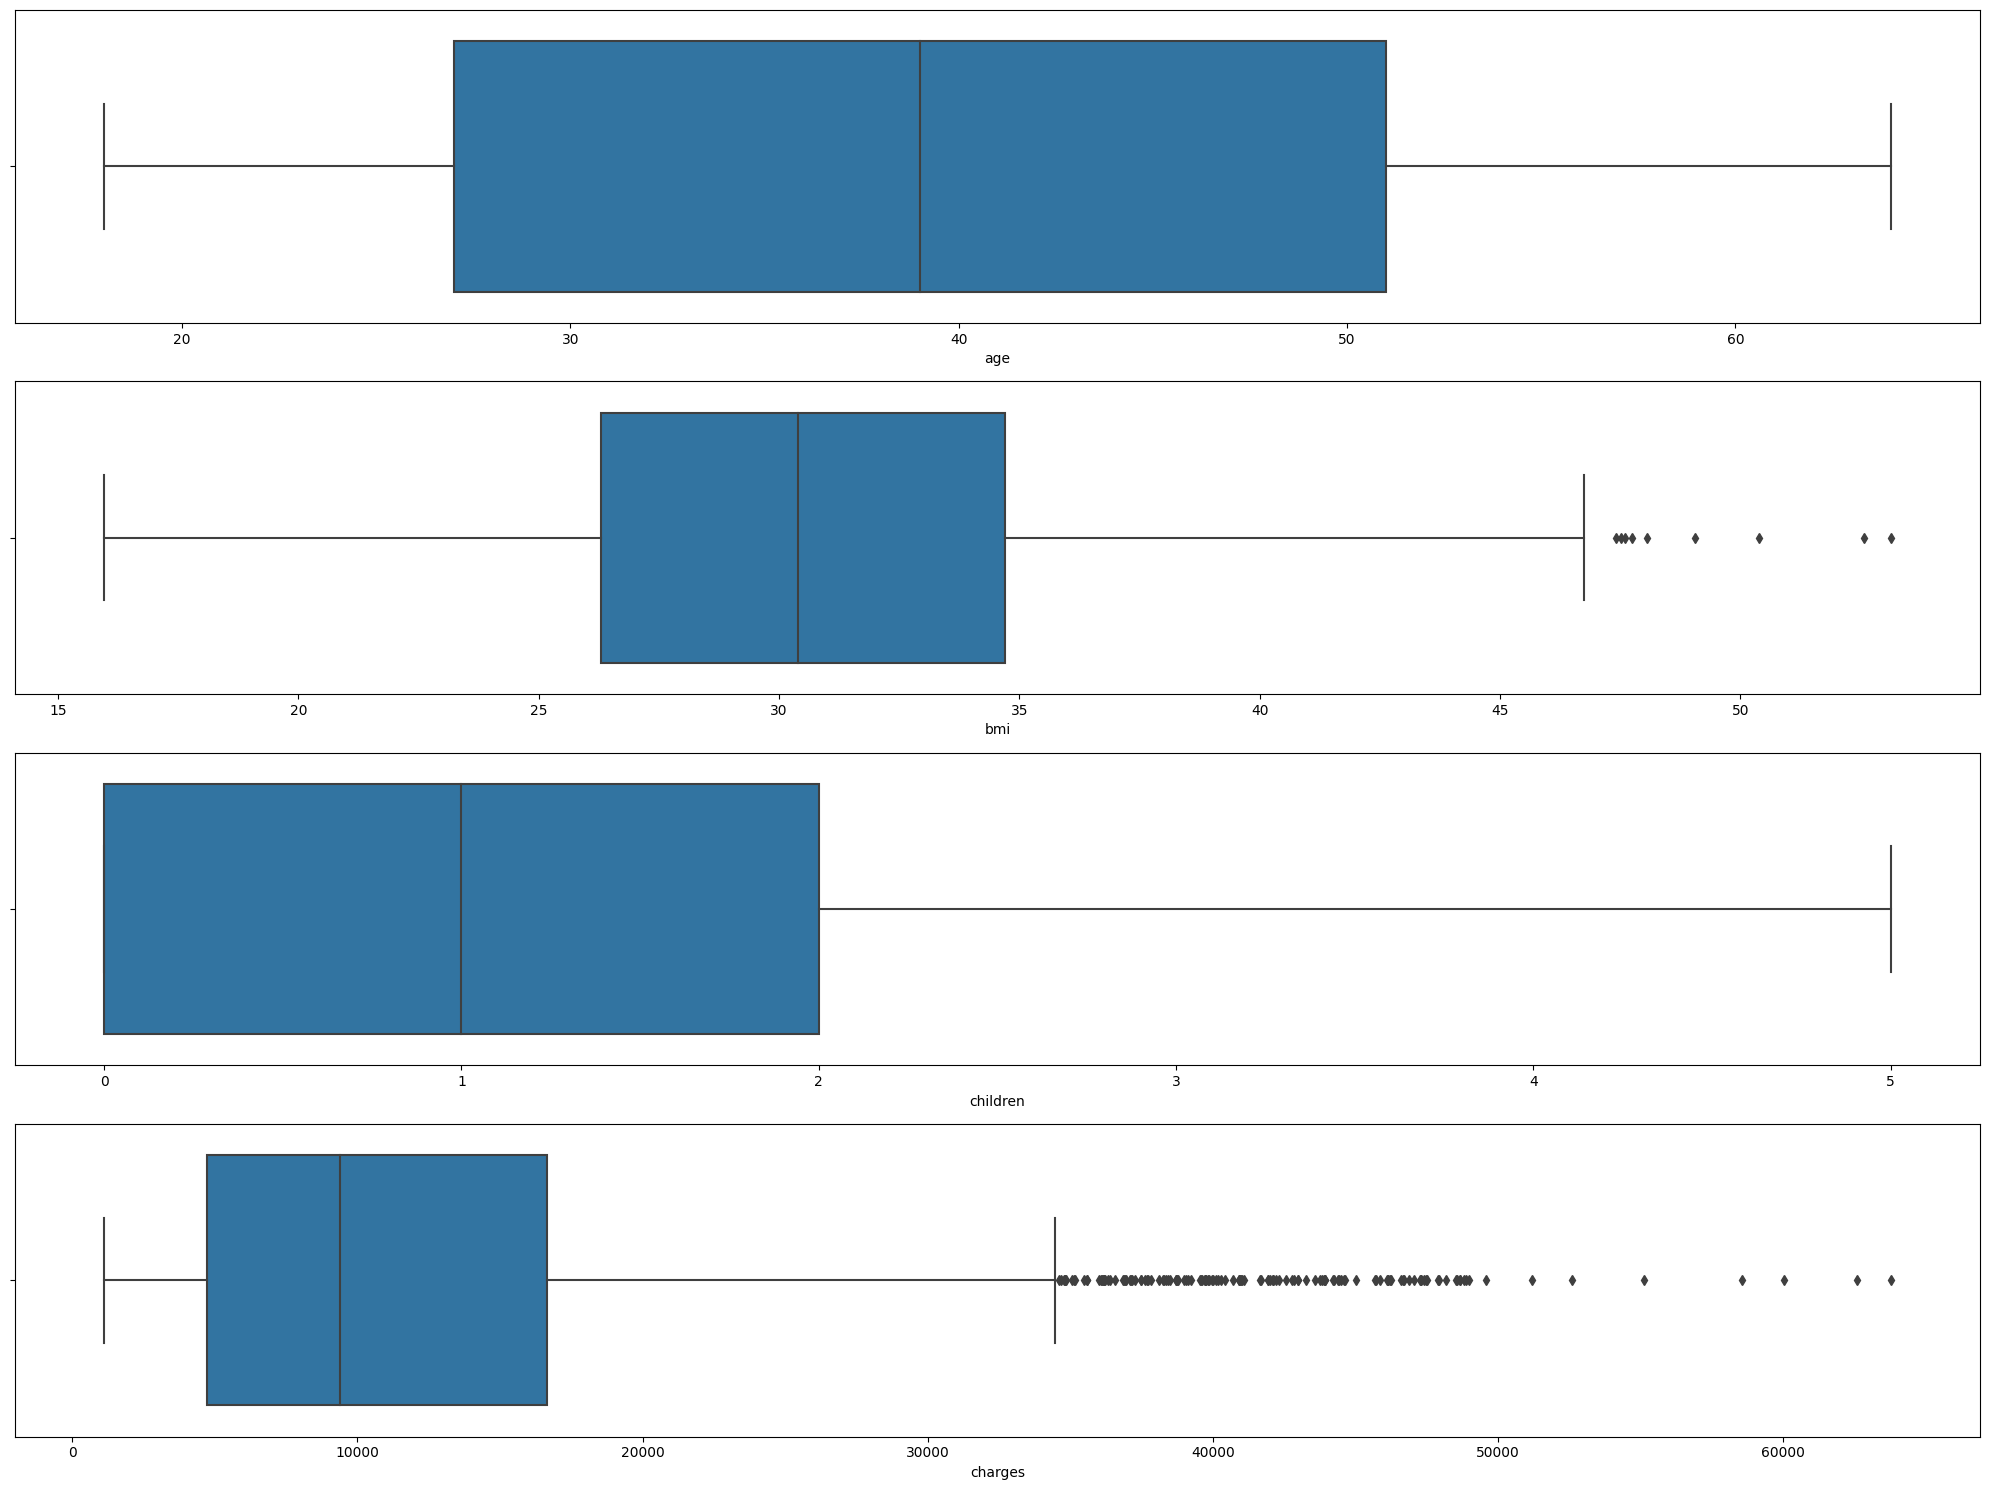

In [60]:
fig, axes = plt.subplots(nrows= 4,ncols= 1, figsize=(20,15))

for i , columna in enumerate(df_numerics.columns):
    
    sns.boxplot(data = df_numerics,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

### me he dado cuenta que dividiendo la gente en fumadores y no fumadores disminuimos los outliers

In [61]:
df_nofum = df[df["smoker"] == "no"]
df_fum = df[df["smoker"] == "yes"]
df_nofum.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [62]:
df_nofum_num = df_nofum.select_dtypes(include = np.number)
df_nofum_num.head()

,age,bmi,children,charges
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160


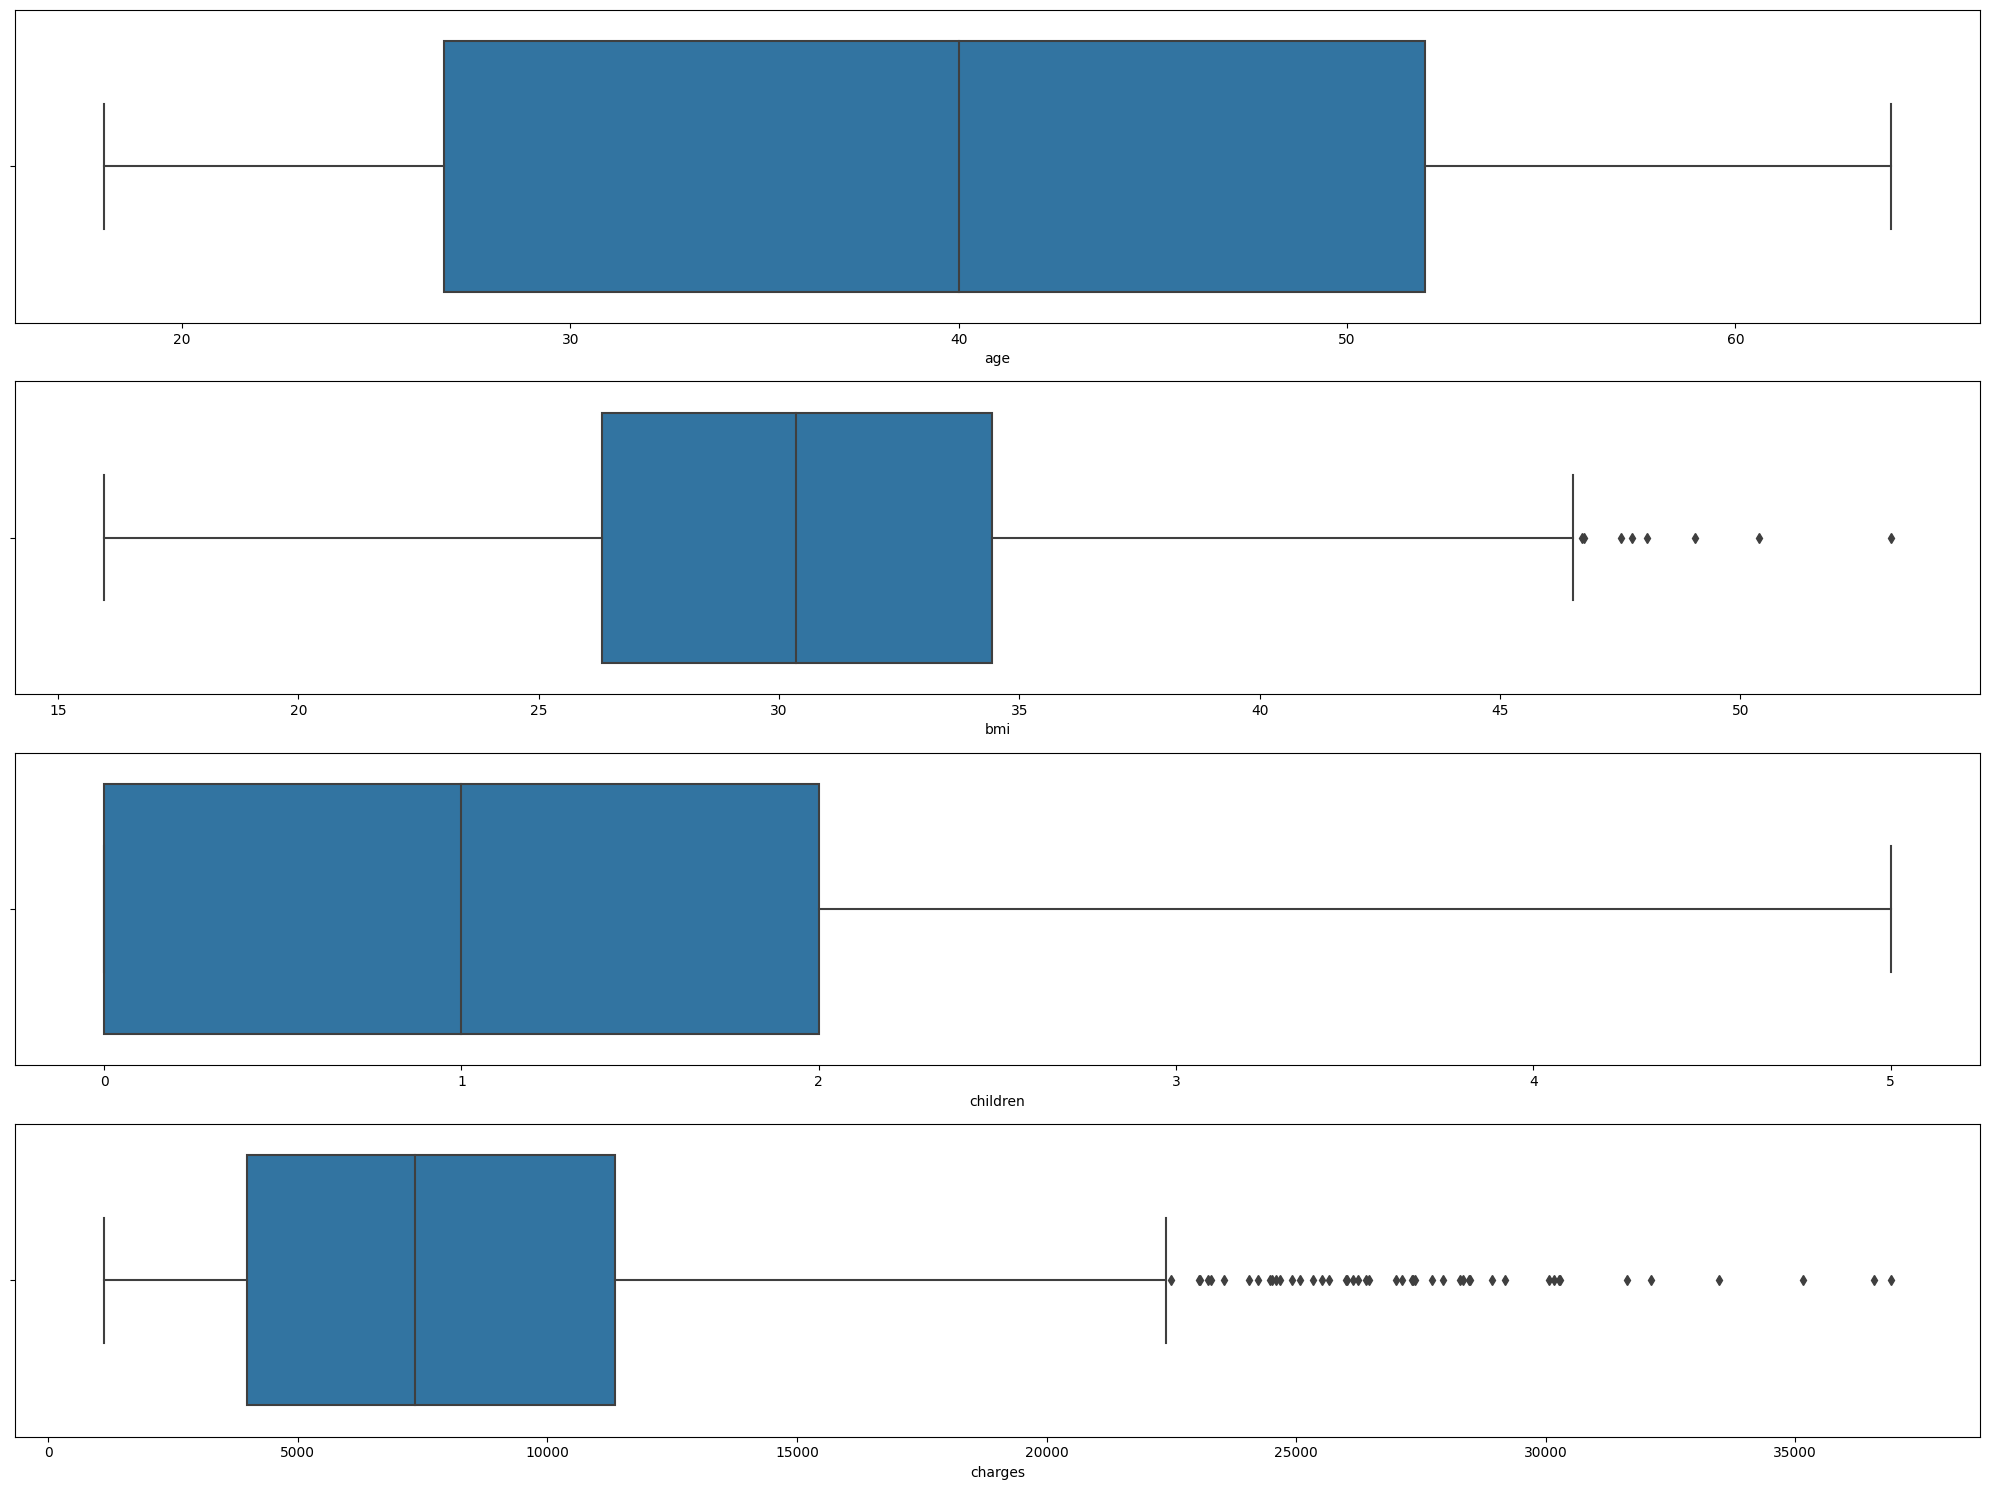

In [63]:
fig, axes = plt.subplots(nrows= 4,ncols= 1, figsize=(20,15))
for i , column in enumerate(df_nofum_num.columns):
    sns.boxplot(data = df_nofum_num,
                x = column,
                ax = axes[i])
    plt.tight_layout()

In [64]:
Q1_nofum = np.percentile(df_nofum['charges'], 25)
Q1_nofum

3986.4386999999997

In [65]:
Q3_nofum = np.percentile(df_nofum['charges'], 75)
Q3_nofum

11362.88705

In [71]:
IQR_nofum = Q3_nofum - Q1_nofum
IQR_nofum

7376.44835

In [72]:
outlier_step = 1.5 * IQR_nofum
outlier_step

11064.672525

In [68]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [73]:
lista_colm_nofum = df_nofum_num.columns.to_list()
dicc_nofum = detectar_outliers(lista_colm_nofum, df_nofum_num)
dicc_nofum

{'bmi': [116, 286, 401, 847, 1088, 1317], 'charges': [242, 1012, 1206]}

In [77]:
outliers_data_nofum = (dicc_nofum["bmi"],dicc_nofum["charges"])
outliers_data_nofum

([116, 286, 401, 847, 1088, 1317], [242, 1012, 1206])

In [78]:
outliers_data_nofum = [indice for sublista in outliers_data_nofum for indice in sublista]
print(outliers_data_nofum)

[116, 286, 401, 847, 1088, 1317, 242, 1012, 1206]


In [85]:
final_nofum = df.copy()

In [88]:
final_nofum = final_nofum.drop(final_nofum.index[outliers_data_nofum])
final_nofum.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
final_nofum.shape

(1329, 7)

### hasta aqui tenemos los otliers de los no fumadores, y ahora vamos a sacar los de los fumadores, posteriormente juntandolos

In [70]:
df_fum_num = df_fum.select_dtypes(include = np.number)
df_fum_num.head()

,age,bmi,children,charges
0,19,27.90,0,16884.9240
11,62,26.29,0,27808.7251
14,27,42.13,0,39611.7577
19,30,35.30,0,36837.4670
23,34,31.92,1,37701.8768


In [91]:
lista_colum_fum = df_fum_num.columns.to_list()
lista_colum_fum

['age', 'bmi', 'children', 'charges']

In [92]:
Q1_fum = np.percentile(df_fum['charges'], 25)
Q1_fum

20826.2442125

In [94]:
Q3_fum = np.percentile(df_fum['charges'], 75)
Q3_fum

41019.207275

In [96]:
IQR_fum = Q3_fum - Q1_fum
IQR_fum

20192.9630625

In [97]:
outlier_step = 1.5 * IQR_fum
outlier_step

30289.44459375

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [99]:
dicc_fum = detectar_outliers(lista_colum_fum,df_fum_num)
dicc_fum

{'bmi': [543, 860, 1047],
 'charges': [14,
  19,
  23,
  29,
  30,
  34,
  38,
  39,
  49,
  53,
  55,
  82,
  84,
  86,
  94,
  109,
  123,
  146,
  158,
  161,
  175,
  185,
  203,
  223,
  240,
  251,
  252,
  254,
  256,
  263,
  265,
  271,
  281,
  288,
  292,
  298,
  312,
  314,
  322,
  327,
  328,
  330,
  338,
  373,
  377,
  381,
  420,
  421,
  422,
  441,
  476,
  488,
  500,
  524,
  530,
  543,
  549,
  558,
  569,
  577,
  587,
  609,
  615,
  621,
  623,
  629,
  665,
  667,
  668,
  674,
  677,
  682,
  689,
  697,
  706,
  725,
  736,
  738,
  739,
  742,
  759,
  803,
  819,
  826,
  828,
  842,
  845,
  850,
  852,
  856,
  860,
  883,
  893,
  901,
  917,
  947,
  951,
  953,
  956,
  958,
  1021,
  1022,
  1031,
  1036,
  1037,
  1047,
  1049,
  1062,
  1070,
  1078,
  1090,
  1096,
  1111,
  1117,
  1118,
  1122,
  1124,
  1139,
  1146,
  1152,
  1156,
  1186,
  1207,
  1218,
  1230,
  1240,
  1241,
  1249,
  1284,
  1288,
  1291,
  1300,
  1301,
  1303,
  1313

In [100]:
outliers_data_fum = (dicc_fum["bmi"],dicc_fum["charges"])
outliers_data_fum

([543, 860, 1047],
 [14,
  19,
  23,
  29,
  30,
  34,
  38,
  39,
  49,
  53,
  55,
  82,
  84,
  86,
  94,
  109,
  123,
  146,
  158,
  161,
  175,
  185,
  203,
  223,
  240,
  251,
  252,
  254,
  256,
  263,
  265,
  271,
  281,
  288,
  292,
  298,
  312,
  314,
  322,
  327,
  328,
  330,
  338,
  373,
  377,
  381,
  420,
  421,
  422,
  441,
  476,
  488,
  500,
  524,
  530,
  543,
  549,
  558,
  569,
  577,
  587,
  609,
  615,
  621,
  623,
  629,
  665,
  667,
  668,
  674,
  677,
  682,
  689,
  697,
  706,
  725,
  736,
  738,
  739,
  742,
  759,
  803,
  819,
  826,
  828,
  842,
  845,
  850,
  852,
  856,
  860,
  883,
  893,
  901,
  917,
  947,
  951,
  953,
  956,
  958,
  1021,
  1022,
  1031,
  1036,
  1037,
  1047,
  1049,
  1062,
  1070,
  1078,
  1090,
  1096,
  1111,
  1117,
  1118,
  1122,
  1124,
  1139,
  1146,
  1152,
  1156,
  1186,
  1207,
  1218,
  1230,
  1240,
  1241,
  1249,
  1284,
  1288,
  1291,
  1300,
  1301,
  1303,
  1313,
  1323])

In [101]:
outliers_data_fum = [indice for sublista in outliers_data_fum for indice in sublista]
print(outliers_data_fum)

[543, 860, 1047, 14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]


In [102]:
len(outliers_data_fum)

139

In [103]:
final = final_nofum.drop(final_nofum.index[outliers_data_fum])
final.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
final.to_csv("no_ouliers_insurance.csv")

#### ahora procedemos con la normalizacion(Variable respuesta) y estandarizacion(Variabless predictorias)

In [111]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [109]:
final.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


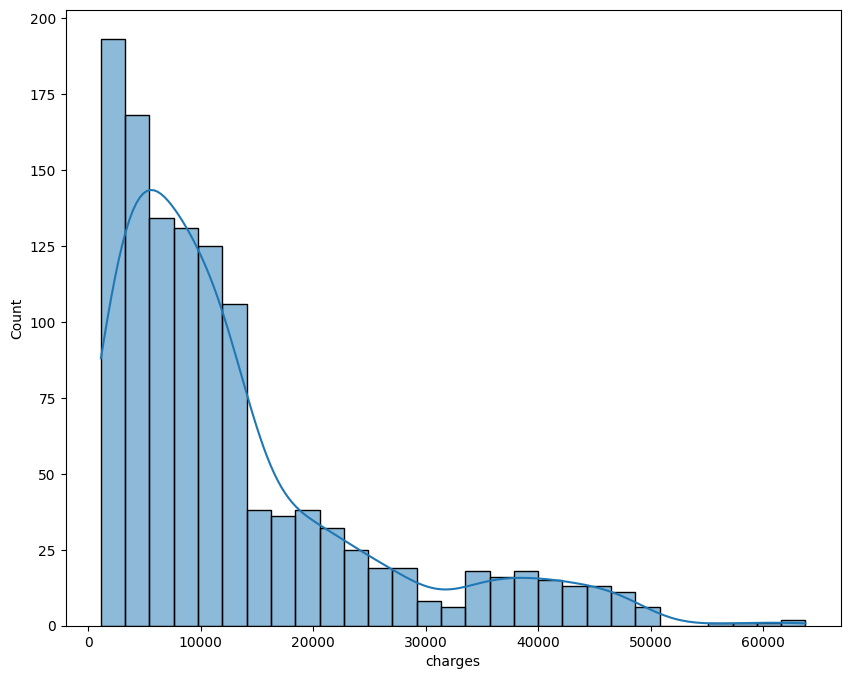

In [110]:
sns.histplot(data=final,
             x = "charges",
             kde =True);

### no hay distribucion normal, por lo que tendremos que transformar los datos


In [112]:
"""Ahi esta el pvalor: es una medida estadística que se utiliza en pruebas de hipótesis para determinar 
la significancia de los resultados obtenidos. En el contexto de machine learning, el valor p se utiliza 
para evaluar la validez estadística de los modelos de aprendizaje automático.

El valor p se calcula comparando la probabilidad de obtener los resultados observados bajo 
la hipótesis nula (es decir, que no hay relación entre las variables) con la probabilidad de obtener
 los mismos resultados bajo una hipótesis alternativa (es decir, que hay una relación entre las variables).
 Si el valor p es muy pequeño, típicamente menor que 0.05 o 0.01, se considera que los resultados
  son estadísticamente significativos y se rechaza la hipótesis nula.

En el contexto de machine learning, el valor p se utiliza para evaluar la significancia
 de los coeficientes de los modelos de regresión, la importancia de las características o variables
 predictivas y la significancia de las diferencias entre modelos. El valor p también se utiliza para evaluar
 la validez de los métodos de selección de características y de validación cruzada.
"""
stats.shapiro(final["charges"]) #Muy menor a 0,05, por lo que bien 👍

ShapiroResult(statistic=0.8154857754707336, pvalue=6.990618986592065e-35)

In [114]:
final_num= final.select_dtypes(include = np.number)
final_column_num = final_num.columns.to_list()
final_column_num

['age', 'bmi', 'children', 'charges']

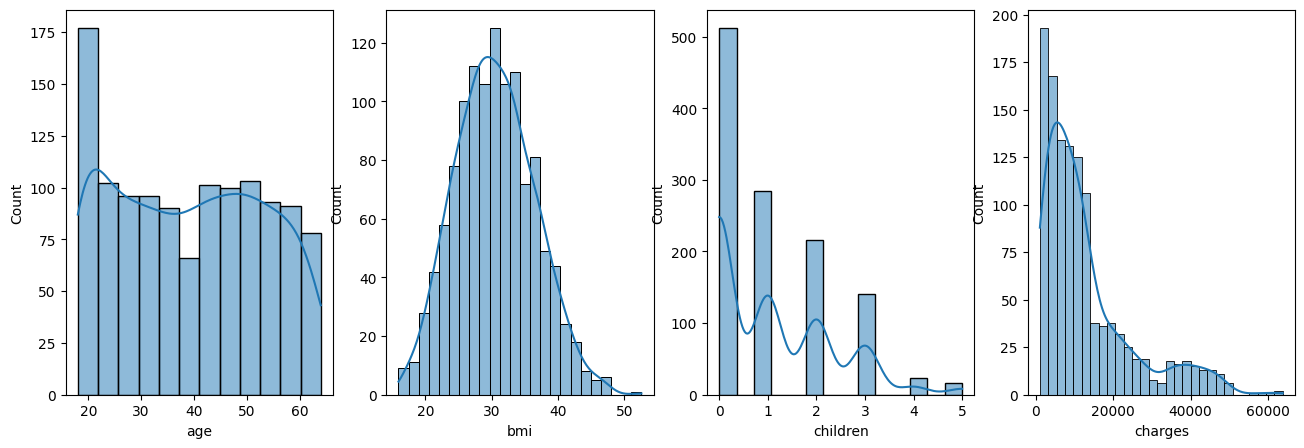

In [119]:
fig, ax = plt.subplots(1,5, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(final_column_num):
    sns.histplot(data = final_num, x = columna, kde = True, ax = ax[i])
    
fig.delaxes(ax[-1])
plt.show()

#### Vamos a aplicarle a nuestra variable la normalizacion "normal o manual"


In [120]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = final["charges"].mean()
maximo = final["charges"].max() 
minimo = final["charges"].min()

In [121]:
final["charges_MANUAL"] = (final["charges"] - media) / (maximo - minimo )

In [122]:
final.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL
0,19,female,27.900,0,yes,southwest,16884.92400,0.063555
1,18,male,33.770,1,no,southeast,1725.55230,-0.178420
2,28,male,33.000,3,no,southeast,4449.46200,-0.134940
3,33,male,22.705,0,no,northwest,21984.47061,0.144955
4,32,male,28.880,0,no,northwest,3866.85520,-0.144240


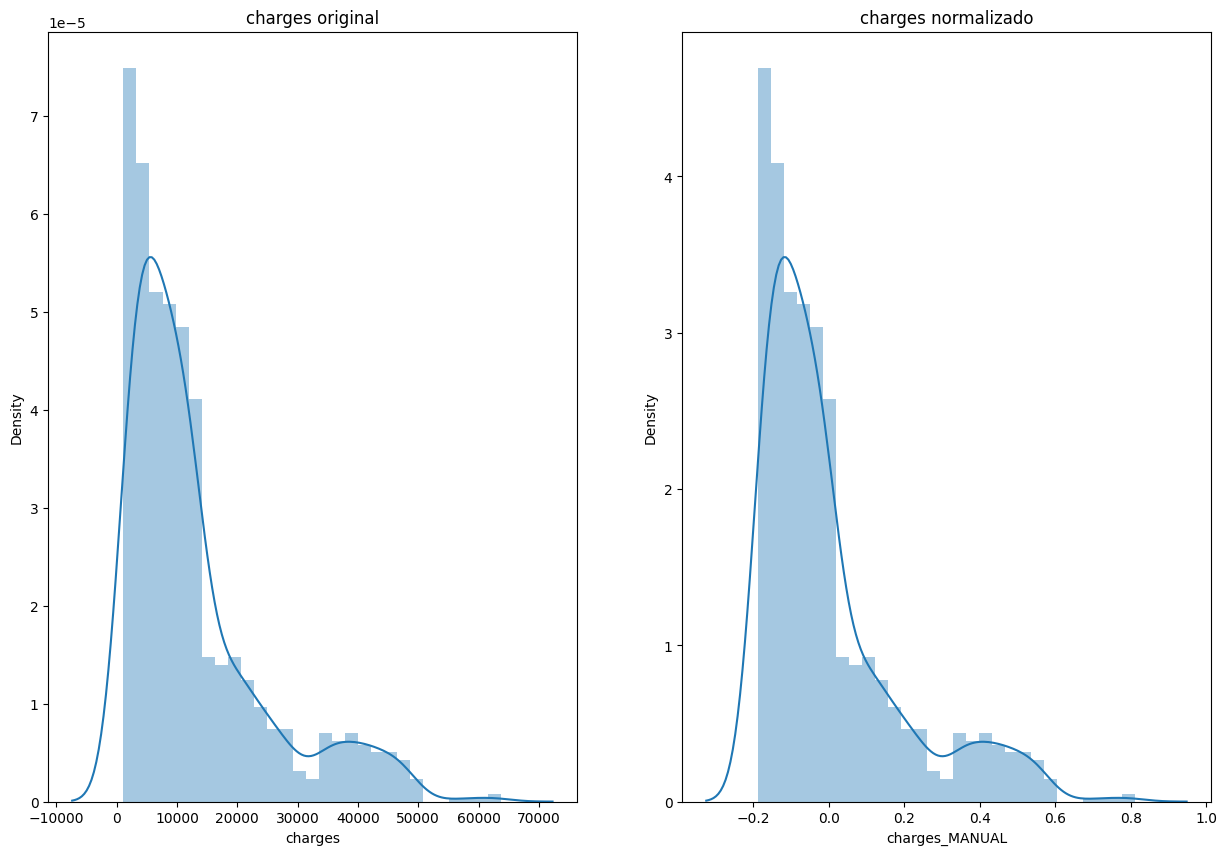

In [123]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_MANUAL'], ax = axes[1]);

In [125]:
stats.shapiro(final['charges_MANUAL']) # es el mismo pvalor, no cambia

ShapiroResult(statistic=0.8154858350753784, pvalue=6.990783716513298e-35)

#### Normalizacion logaritmica:

In [130]:
final['charges_LOG'] = final['charges'].apply(lambda x: np.log(x))
final.head()


,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG
0,19,female,27.900,0,yes,southwest,16884.92400,0.063555,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,-0.178420,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,-0.134940,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,0.144955,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,-0.144240,8.260197


In [132]:
stats.shapiro(final['charges_LOG']) ## en este caso el pvalor es mayor por lo que seria "peor"

ShapiroResult(statistic=0.9855661988258362, pvalue=1.7149278663808332e-09)

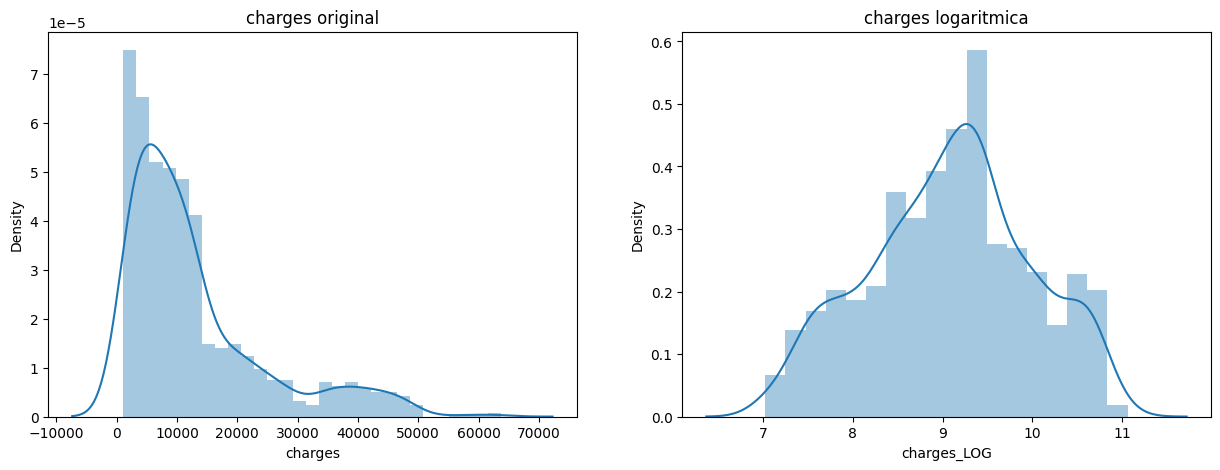

In [133]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges logaritmica')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_LOG'], ax = axes[1]);

#### normalizacion tipo Raiz cuadrada

In [ ]:
final['charges_SQRT'] = 

In [135]:
final['charges_SQRT'] = final['charges'].apply(lambda x: math.sqrt(x))
final.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT
0,19,female,27.900,0,yes,southwest,16884.92400,0.063555,9.734176,129.942002
1,18,male,33.770,1,no,southeast,1725.55230,-0.178420,7.453302,41.539768
2,28,male,33.000,3,no,southeast,4449.46200,-0.134940,8.400538,66.704288
3,33,male,22.705,0,no,northwest,21984.47061,0.144955,9.998092,148.271611
4,32,male,28.880,0,no,northwest,3866.85520,-0.144240,8.260197,62.184043


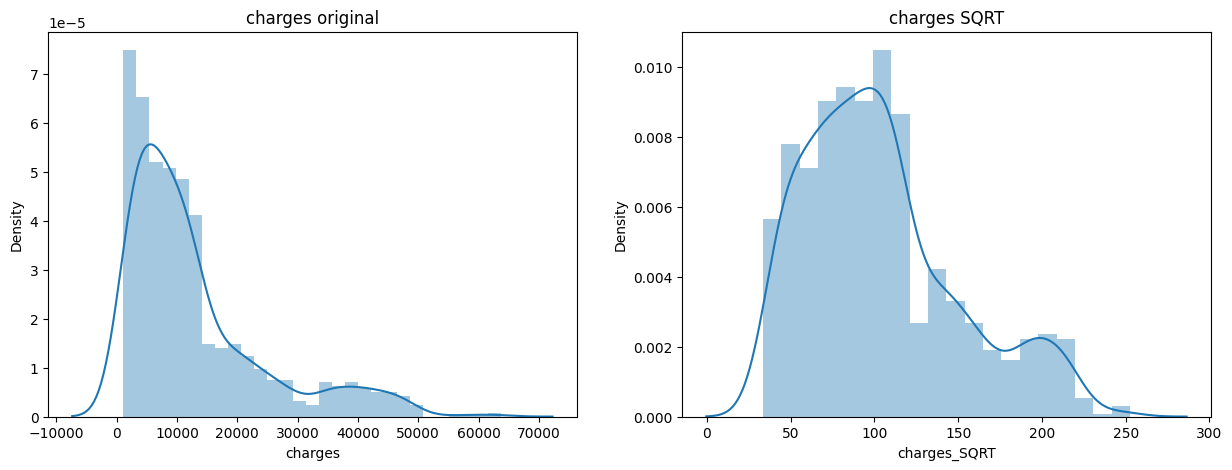

In [136]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges SQRT')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_SQRT'], ax = axes[1]);

In [138]:
stats.shapiro(final['charges_SQRT']) #mas que pequeña que la logaritmica pero mas grande que la manual

ShapiroResult(statistic=0.9374821782112122, pvalue=5.577656555147779e-22)

#### Metodo boxcox

In [140]:
from scipy import stats

In [142]:
final["charges_BOX"] , lambda_ajustada = stats.boxcox(final["charges"])

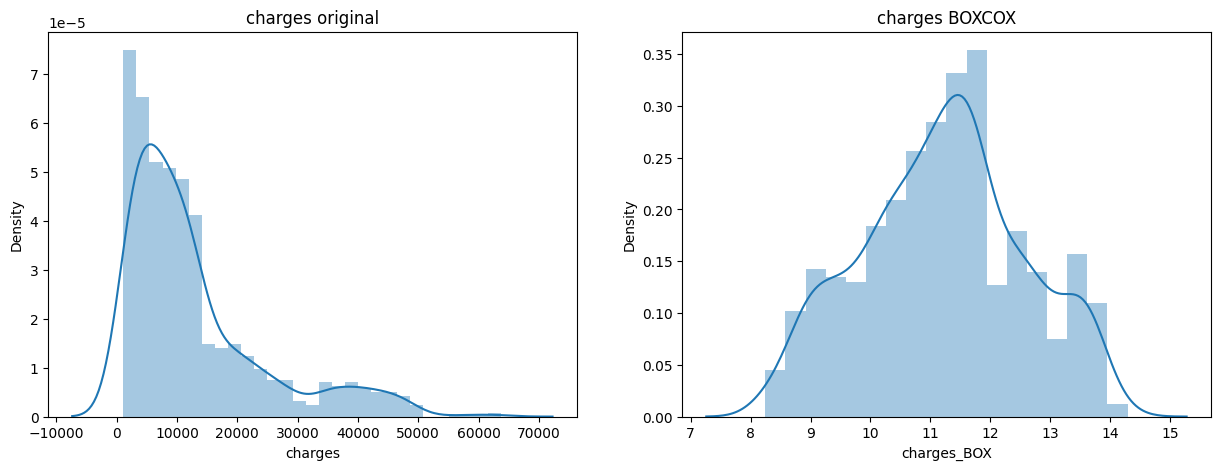

In [144]:
final["charges_BOX"], lambda_ajustada = stats.boxcox(final["charges"])

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges BOXCOX')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_BOX'], ax = axes[1]);

In [146]:
stats.shapiro(final['charges_BOX']) # igual a la logaritmica

ShapiroResult(statistic=0.9860344529151917, pvalue=2.816233690694503e-09)

#### metodo Sklearn MinMaxScaller

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [152]:
# ajustamos el modelo utilizando nuestro set de datos , ***DOBLE CORCHETE
minmax.fit(final[['charges']])

MinMaxScaler()

In [153]:
# transformamos los datos
X_normalizadas = minmax.transform(final[['charges']])

In [154]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [155]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [157]:
# lo unimos a nuestro dataframe original
final['charges_NORM'] = X_normalizadas
final.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM
0,19,female,27.900,0,yes,southwest,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611
1,18,male,33.770,1,no,southeast,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636
2,28,male,33.000,3,no,southeast,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115
3,33,male,22.705,0,no,northwest,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010
4,32,male,28.880,0,no,northwest,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816


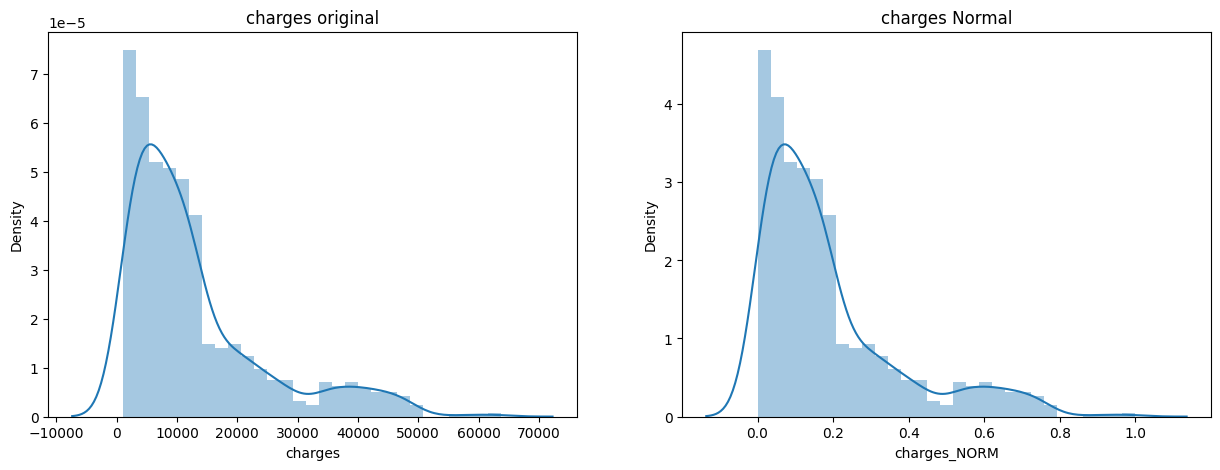

In [158]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges Normal')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_NORM'], ax = axes[1]);

In [160]:
stats.shapiro(final['charges_NORM']) ## la grafica es exactamente igual que la manual

ShapiroResult(statistic=0.8154858350753784, pvalue=6.990783716513298e-35)

### estandarizacion


In [162]:
## esto es un metodo que estandariza automaticamente todas las columnas del dataframe que le pasemos
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [169]:
lista_columnas = final_num.columns.drop("charges")
lista_columnas

Index(['age', 'bmi', 'children'], dtype='object')

In [170]:
scaler.fit(final[lista_columnas])

StandardScaler()

In [171]:
X_escaladas = scaler.transform(final[lista_columnas])
X_escaladas

array([[-1.42943631, -0.43905227, -0.90862962],
       [-1.50066632,  0.55060056, -0.08492511],
       [-0.78836628,  0.42078239,  1.56248392],
       ...,
       [-1.50066632,  1.06987325, -0.90862962],
       [-1.2869763 , -0.79310183, -0.90862962],
       [ 1.56222385, -0.24179608, -0.90862962]])

In [175]:
df_STD1 = final.copy()
df_STD1[lista_columnas] = X_escaladas
df_STD1.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM
0,-1.429436,female,-0.439052,-0.908630,yes,southwest,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611
1,-1.500666,male,0.550601,-0.084925,no,southeast,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636
2,-0.788366,male,0.420782,1.562484,no,southeast,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115
3,-0.432216,male,-1.314903,-0.908630,no,northwest,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010
4,-0.503446,male,-0.273829,-0.908630,no,northwest,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816


### Metodo Sklearn RobustScaler

In [176]:
from sklearn.preprocessing import RobustScaler

In [177]:
# construir el modelo de escalador
robust = RobustScaler()

In [179]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(final[lista_columnas])


RobustScaler()

In [180]:
X_robust = robust.transform(final[lista_columnas])

In [182]:
df_STD2 = final.copy()
df_STD2[lista_columnas] = X_robust
df_STD2.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM
0,-0.80,female,-0.282396,-0.5,yes,southwest,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611
1,-0.84,male,0.435208,0.0,no,southeast,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636
2,-0.44,male,0.341076,1.0,no,southeast,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115
3,-0.24,male,-0.917482,-0.5,no,northwest,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010
4,-0.28,male,-0.162592,-0.5,no,northwest,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816


#### ¿Cual uso para hacer el encoding?

In [183]:
# antes de empezar importemos las librerías que necesitaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [184]:
df_STD1.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM
0,-1.429436,female,-0.439052,-0.908630,yes,southwest,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611
1,-1.500666,male,0.550601,-0.084925,no,southeast,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636
2,-0.788366,male,0.420782,1.562484,no,southeast,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115
3,-0.432216,male,-1.314903,-0.908630,no,northwest,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010
4,-0.503446,male,-0.273829,-0.908630,no,northwest,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816


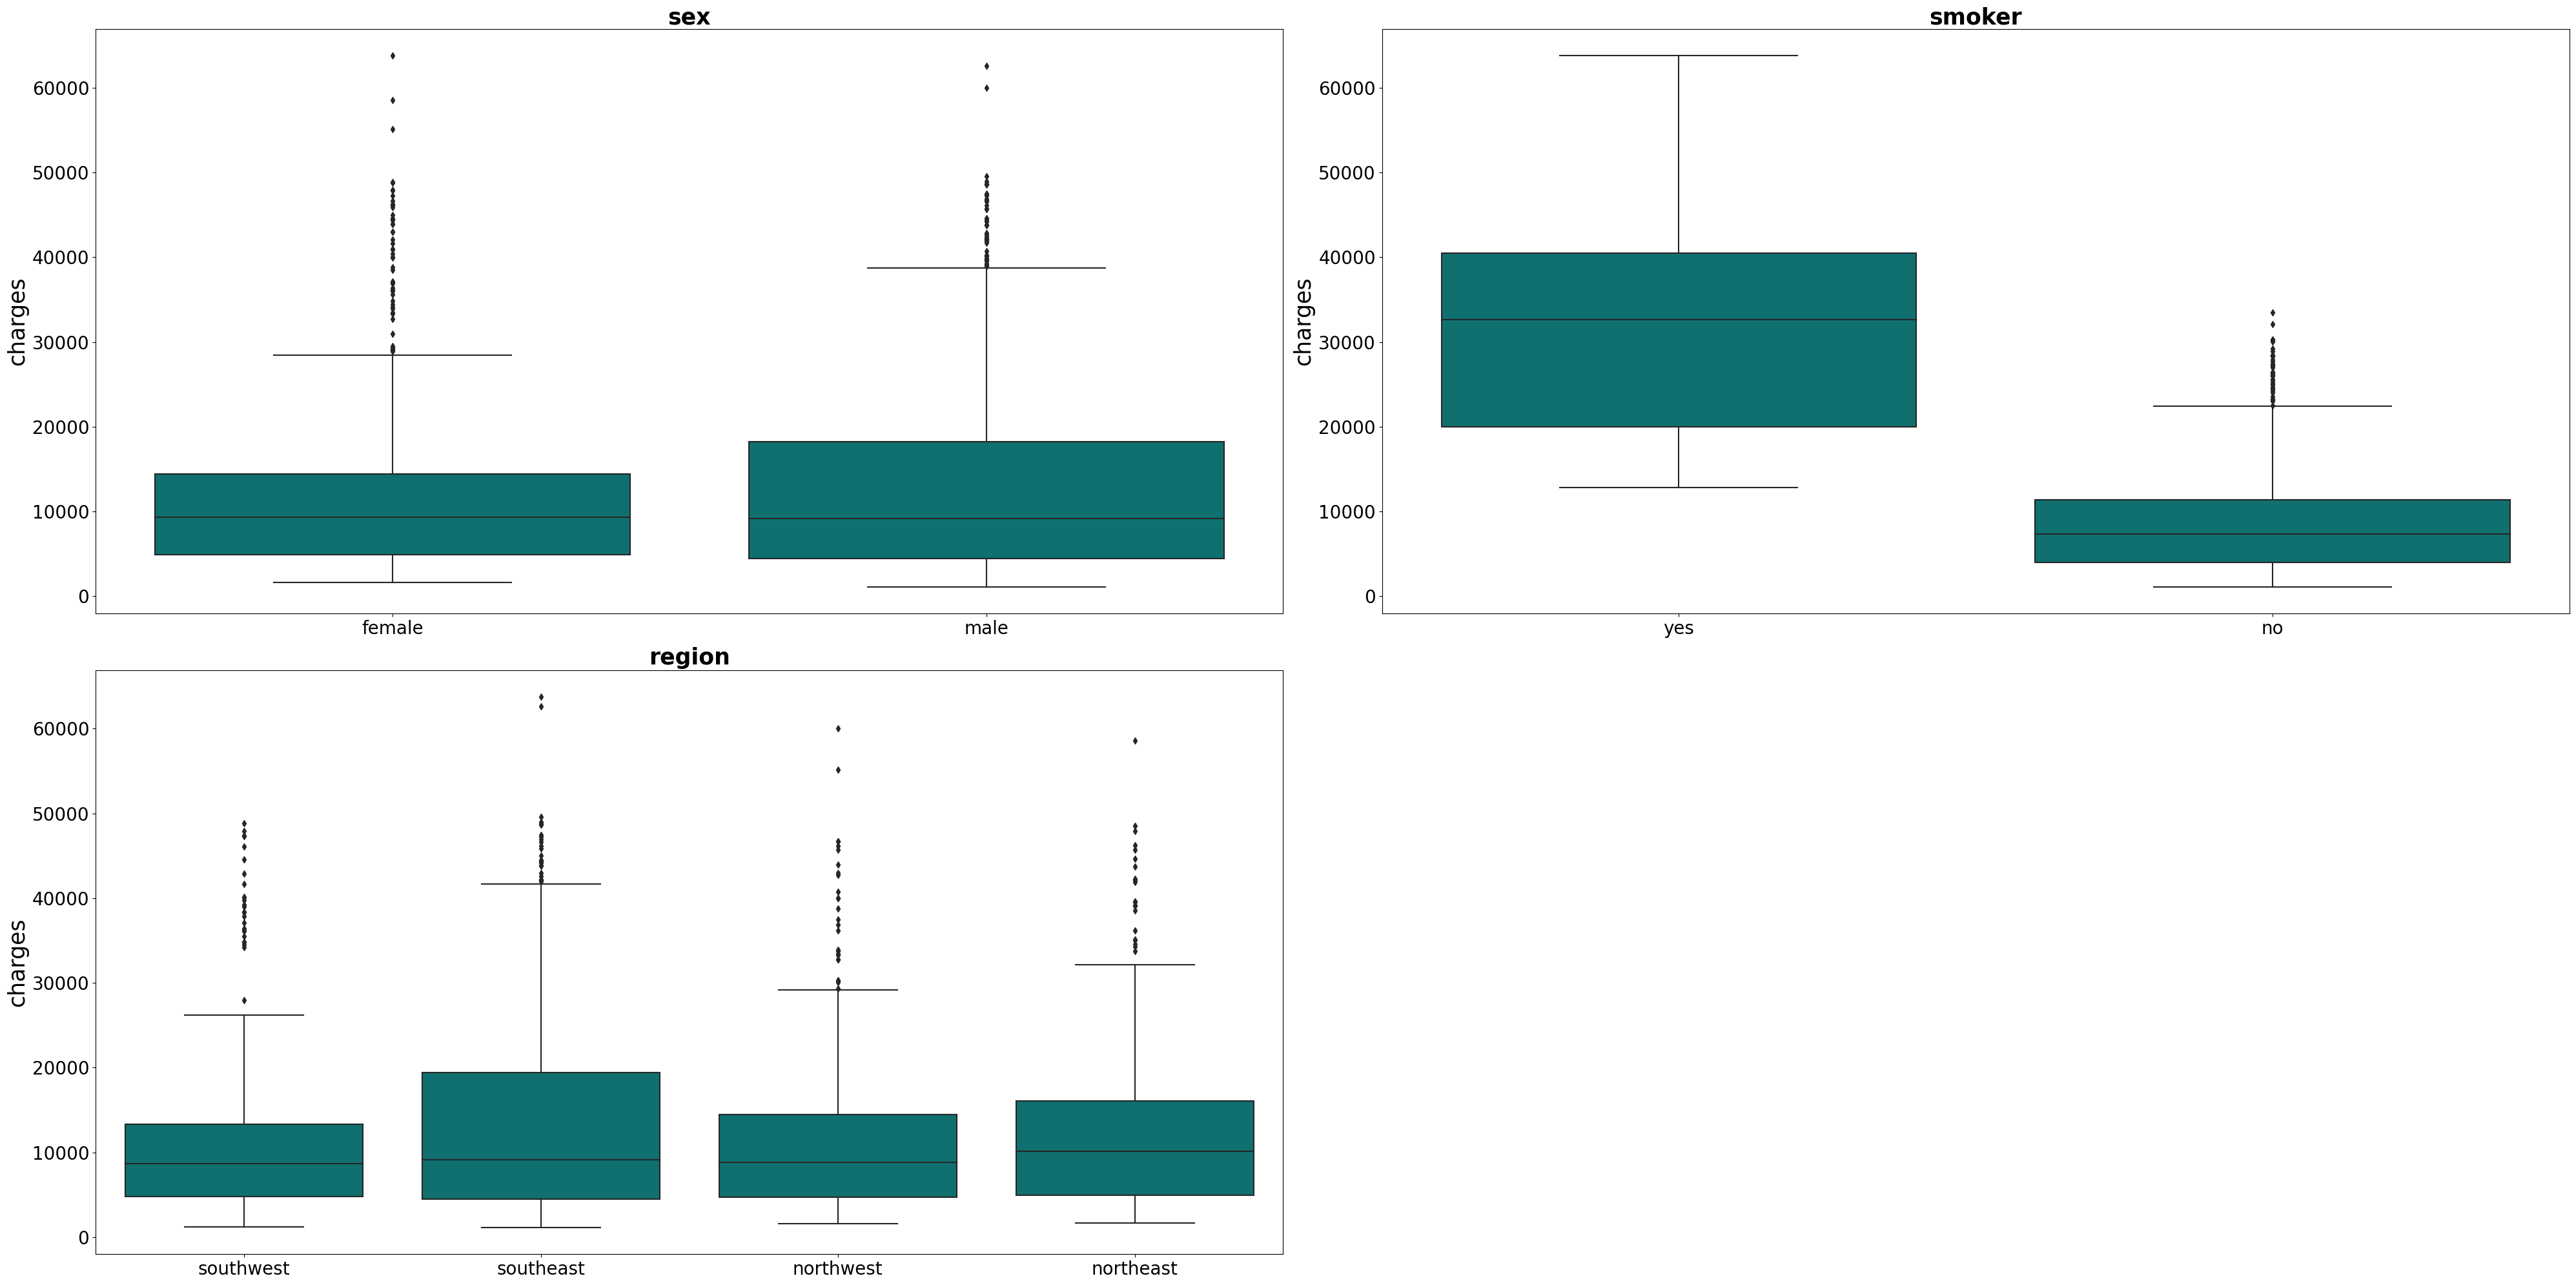

In [185]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df_STD1.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df_STD1,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

#### la unica que creo que tiene orden es la de fumador/no fumador. Las personas que fuman tienen mas gastos por lo que puede ser un orden.
#### la region y el sexo no tienen orden. He aplicado Label-encoder

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [189]:

for col in df_STD1[["smoker", "region"]].columns:
    nuevo_nombre = col + "_encoded"
    df_STD1[nuevo_nombre] = le.fit_transform(df_STD1[col])

In [193]:
df_STD1.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM,smoker_encoded,region_encoded,Sex_encoded
0,-1.429436,female,-0.439052,-0.908630,yes,southwest,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611,1,3,0
1,-1.500666,male,0.550601,-0.084925,no,southeast,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636,0,2,1
2,-0.788366,male,0.420782,1.562484,no,southeast,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115,0,2,1
3,-0.432216,male,-1.314903,-0.908630,no,northwest,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010,0,1,1
4,-0.503446,male,-0.273829,-0.908630,no,northwest,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816,0,1,1


In [191]:
sex_transformada = le.fit_transform(df_STD1["sex"])
sex_transformada

array([0, 1, 1, ..., 0, 0, 0])

In [192]:
df_STD1["Sex_encoded"] = le.fit_transform(df_STD1["sex"])

In [194]:
df_final_STD1 = df_STD1.select_dtypes(include = np.number)
df_final_STD1.head()

,age,bmi,children,charges,charges_MANUAL,charges_LOG,charges_SQRT,charges_BOX,charges_NORM,smoker_encoded,region_encoded,Sex_encoded
0,-1.429436,-0.439052,-0.908630,16884.92400,0.063555,9.734176,129.942002,12.184384,0.251611,1,3,0
1,-1.500666,0.550601,-0.084925,1725.55230,-0.178420,7.453302,41.539768,8.838910,0.009636,0,2,1
2,-0.788366,0.420782,1.562484,4449.46200,-0.134940,8.400538,66.704288,10.187147,0.053115,0,2,1
3,-0.432216,-1.314903,-0.908630,21984.47061,0.144955,9.998092,148.271611,12.593871,0.333010,0,1,1
4,-0.503446,-0.273829,-0.908630,3866.85520,-0.144240,8.260197,62.184043,9.983788,0.043816,0,1,1


In [ ]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_limpio.drop('median_home_val', axis =1)
y = df_limpio['median_home_val']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)